In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator
from itertools import cycle
from math import pi
from pytimeparse.timeparse import timeparse
from json import loads, dumps

import ast

%config Completer.use_jedi = False


# 1. Read Data

In [2]:
# read data

folder_name = os.path.abspath(os.path.abspath(''))

dataset_path = "results/2024"
result_file = "all_results_autogluon.csv"


filepath = os.path.join(folder_name, f"{dataset_path}/{result_file}")
dataframe = pd.read_csv(filepath)
dataframe



,algorithm,data_path,approach,data_label,join_time,total_time,feature_selection_time,depth,accuracy,train_time,feature_importance,join_path_features,cutoff_threshold,redundancy_threshold,rank
0,LightGBM,housing.csv--AddressToRequest-city_record_onli...,ARDA,nyc,NaN,1724.664392,1722.057805,NaN,0.927083,2.606587,{'housing.csv.Project Name': 0.314666666666666...,"['housing.csv.Project ID', 'housing.csv.Projec...",NaN,NaN,NaN
1,RandomForest,housing.csv--AddressToRequest-city_record_onli...,ARDA,nyc,NaN,1723.019991,1722.057805,NaN,0.939583,0.962186,"{'housing.csv.Project Name': 0.409, 'housing.c...","['housing.csv.Project ID', 'housing.csv.Projec...",NaN,NaN,NaN
2,ExtraTrees,housing.csv--AddressToRequest-city_record_onli...,ARDA,nyc,NaN,1722.871554,1722.057805,NaN,0.929167,0.813749,{'housing.csv.Project Name': 0.406333333333333...,"['housing.csv.Project ID', 'housing.csv.Projec...",NaN,NaN,NaN
3,XGBoost,housing.csv--AddressToRequest-city_record_onli...,ARDA,nyc,NaN,1722.368712,1722.057805,NaN,0.910417,0.310907,{'housing.csv.Project Name': 0.344333333333333...,"['housing.csv.Project ID', 'housing.csv.Projec...",NaN,NaN,NaN
4,WeightedEnsemble_L2,housing.csv--AddressToRequest-city_record_onli...,ARDA,nyc,NaN,1722.546007,1722.057805,NaN,0.941667,0.488202,{'housing.csv.Project Name': 0.407666666666666...,"['housing.csv.Project ID', 'housing.csv.Projec...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,LightGBM,table10.csv--V3-table2.csv,TFD_BFS,steel,NaN,67.349799,67.031641,NaN,0.861736,0.318158,"{'table10.csv.V28': 0.08020565552699228, 'tabl...","['table2.csv.V26', 'table2.csv.V19', 'table2.c...",0.65,NaN,NaN
76,RandomForest,table10.csv--V3-table2.csv,TFD_BFS,steel,NaN,67.859741,67.031641,NaN,0.842444,0.828100,"{'table10.csv.V28': 0.08123393316195375, 'tabl...","['table2.csv.V26', 'table2.csv.V19', 'table2.c...",0.65,NaN,NaN
77,ExtraTrees,table10.csv--V3-table2.csv,TFD_BFS,steel,NaN,67.830061,67.031641,NaN,0.829582,0.798420,"{'table10.csv.V28': 0.07814910025706945, 'tabl...","['table2.csv.V26', 'table2.csv.V19', 'table2.c...",0.65,NaN,NaN
78,XGBoost,table10.csv--V3-table2.csv,TFD_BFS,steel,NaN,67.361522,67.031641,NaN,0.868167,0.329881,"{'table10.csv.V28': 0.08637532133676092, 'tabl...","['table2.csv.V26', 'table2.csv.V19', 'table2.c...",0.65,NaN,NaN


# 2. Process data

## Remove unused columns

In [3]:
dataframe.drop(columns=['join_time', 'depth', 'redundancy_threshold', 'rank'], inplace=True)
dataframe

,algorithm,data_path,approach,data_label,total_time,feature_selection_time,accuracy,train_time,feature_importance,join_path_features,cutoff_threshold
0,LightGBM,housing.csv--AddressToRequest-city_record_onli...,ARDA,nyc,1724.664392,1722.057805,0.927083,2.606587,{'housing.csv.Project Name': 0.314666666666666...,"['housing.csv.Project ID', 'housing.csv.Projec...",NaN
1,RandomForest,housing.csv--AddressToRequest-city_record_onli...,ARDA,nyc,1723.019991,1722.057805,0.939583,0.962186,"{'housing.csv.Project Name': 0.409, 'housing.c...","['housing.csv.Project ID', 'housing.csv.Projec...",NaN
2,ExtraTrees,housing.csv--AddressToRequest-city_record_onli...,ARDA,nyc,1722.871554,1722.057805,0.929167,0.813749,{'housing.csv.Project Name': 0.406333333333333...,"['housing.csv.Project ID', 'housing.csv.Projec...",NaN
3,XGBoost,housing.csv--AddressToRequest-city_record_onli...,ARDA,nyc,1722.368712,1722.057805,0.910417,0.310907,{'housing.csv.Project Name': 0.344333333333333...,"['housing.csv.Project ID', 'housing.csv.Projec...",NaN
4,WeightedEnsemble_L2,housing.csv--AddressToRequest-city_record_onli...,ARDA,nyc,1722.546007,1722.057805,0.941667,0.488202,{'housing.csv.Project Name': 0.407666666666666...,"['housing.csv.Project ID', 'housing.csv.Projec...",NaN
...,...,...,...,...,...,...,...,...,...,...,...
75,LightGBM,table10.csv--V3-table2.csv,TFD_BFS,steel,67.349799,67.031641,0.861736,0.318158,"{'table10.csv.V28': 0.08020565552699228, 'tabl...","['table2.csv.V26', 'table2.csv.V19', 'table2.c...",0.65
76,RandomForest,table10.csv--V3-table2.csv,TFD_BFS,steel,67.859741,67.031641,0.842444,0.828100,"{'table10.csv.V28': 0.08123393316195375, 'tabl...","['table2.csv.V26', 'table2.csv.V19', 'table2.c...",0.65
77,ExtraTrees,table10.csv--V3-table2.csv,TFD_BFS,steel,67.830061,67.031641,0.829582,0.798420,"{'table10.csv.V28': 0.07814910025706945, 'tabl...","['table2.csv.V26', 'table2.csv.V19', 'table2.c...",0.65
78,XGBoost,table10.csv--V3-table2.csv,TFD_BFS,steel,67.361522,67.031641,0.868167,0.329881,"{'table10.csv.V28': 0.08637532133676092, 'tabl...","['table2.csv.V26', 'table2.csv.V19', 'table2.c...",0.65


## Process columns

In [4]:
def parse_feature_importance(dataframe):

    result = dataframe['feature_importance']

    number_of_features = []
    features = []
    for i in result:
        j = i.replace("\'", "\"")
        js = loads(j)
        number_of_features.append(len(js.values()))
        features.append(list(js.keys()))

#     print(number_of_features)
    return number_of_features, features


In [5]:
def parse_join_path_features(dataframe):
    dataframe['join_path_features'] = dataframe['join_path_features'].fillna('')
    result = dataframe['join_path_features']

    number_of_features = []
    jp_features = []
    for i in result:
        j = i.replace("[", "")
        j = j.replace("]", "")
        j = j.replace("'", "")
        k = j.split(", ")
    #     print(k)
    #     print(len(k))

        if len(k) == 1:
            number_of_features.append(0)
        else:
            number_of_features.append(len(k))
        jp_features.append(k)

#     print(number_of_features)
    # print(jp_features)
    return number_of_features, jp_features
    

In [6]:
def determine_common_features(dataframe):

    nr_common_features = []
    difference = []

    for i, values in enumerate(features):
        set_a = set(values)
        set_b = set(jp_features[i])

#         print(set_a)
#         print(set_b)
    #     print(len(set_a.intersection(set_b)))

        nr_common_features.append(len(set_a.intersection(set_b)))
        difference.append(set_b - set_a)

    # print(nr_common_features)
    # print(difference)
    return nr_common_features, difference


In [7]:
number_of_features, features = parse_feature_importance(dataframe)
dataframe['number_features_importance'] = number_of_features

number_of_features, jp_features = parse_join_path_features(dataframe)
dataframe['number_join_path_features'] = number_of_features

nr_common_features, difference = determine_common_features(dataframe)
dataframe['nr_common_features'] = nr_common_features
dataframe['different_features'] = difference

dataframe

,algorithm,data_path,approach,data_label,total_time,feature_selection_time,accuracy,train_time,feature_importance,join_path_features,cutoff_threshold,number_features_importance,number_join_path_features,nr_common_features,different_features
0,LightGBM,housing.csv--AddressToRequest-city_record_onli...,ARDA,nyc,1724.664392,1722.057805,0.927083,2.606587,{'housing.csv.Project Name': 0.314666666666666...,"['housing.csv.Project ID', 'housing.csv.Projec...",NaN,3,3,3,{}
1,RandomForest,housing.csv--AddressToRequest-city_record_onli...,ARDA,nyc,1723.019991,1722.057805,0.939583,0.962186,"{'housing.csv.Project Name': 0.409, 'housing.c...","['housing.csv.Project ID', 'housing.csv.Projec...",NaN,3,3,3,{}
2,ExtraTrees,housing.csv--AddressToRequest-city_record_onli...,ARDA,nyc,1722.871554,1722.057805,0.929167,0.813749,{'housing.csv.Project Name': 0.406333333333333...,"['housing.csv.Project ID', 'housing.csv.Projec...",NaN,3,3,3,{}
3,XGBoost,housing.csv--AddressToRequest-city_record_onli...,ARDA,nyc,1722.368712,1722.057805,0.910417,0.310907,{'housing.csv.Project Name': 0.344333333333333...,"['housing.csv.Project ID', 'housing.csv.Projec...",NaN,3,3,3,{}
4,WeightedEnsemble_L2,housing.csv--AddressToRequest-city_record_onli...,ARDA,nyc,1722.546007,1722.057805,0.941667,0.488202,{'housing.csv.Project Name': 0.407666666666666...,"['housing.csv.Project ID', 'housing.csv.Projec...",NaN,3,3,3,{}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,LightGBM,table10.csv--V3-table2.csv,TFD_BFS,steel,67.349799,67.031641,0.861736,0.318158,"{'table10.csv.V28': 0.08020565552699228, 'tabl...","['table2.csv.V26', 'table2.csv.V19', 'table2.c...",0.65,13,13,13,{}
76,RandomForest,table10.csv--V3-table2.csv,TFD_BFS,steel,67.859741,67.031641,0.842444,0.828100,"{'table10.csv.V28': 0.08123393316195375, 'tabl...","['table2.csv.V26', 'table2.csv.V19', 'table2.c...",0.65,13,13,13,{}
77,ExtraTrees,table10.csv--V3-table2.csv,TFD_BFS,steel,67.830061,67.031641,0.829582,0.798420,"{'table10.csv.V28': 0.07814910025706945, 'tabl...","['table2.csv.V26', 'table2.csv.V19', 'table2.c...",0.65,13,13,13,{}
78,XGBoost,table10.csv--V3-table2.csv,TFD_BFS,steel,67.361522,67.031641,0.868167,0.329881,"{'table10.csv.V28': 0.08637532133676092, 'tabl...","['table2.csv.V26', 'table2.csv.V19', 'table2.c...",0.65,13,13,13,{}


In [11]:
res = dataframe.loc[dataframe['number_features_importance'] != dataframe["number_join_path_features"]]

res
# print(res['feature_importance'])
# print(res['join_path_features'])


,algorithm,data_path,approach,data_label,total_time,feature_selection_time,accuracy,train_time,feature_importance,join_path_features,cutoff_threshold,number_features_importance,number_join_path_features,nr_common_features,different_features
20,LightGBM,school,BASE,school,0.262005,NaN,0.721831,0.262005,"{'School Type': 0.09070422535211271, 'Total Pa...","['DBN', 'School Name', 'School Type', 'Total P...",NaN,5,6,5,{DBN}
21,RandomForest,school,BASE,school,0.923227,NaN,0.679577,0.923227,{'Total Parent Response Rate (%)': 0.071549295...,"['DBN', 'School Name', 'School Type', 'Total P...",NaN,5,6,5,{DBN}
22,ExtraTrees,school,BASE,school,0.937383,NaN,0.697183,0.937383,{'Total Parent Response Rate (%)': 0.038873239...,"['DBN', 'School Name', 'School Type', 'Total P...",NaN,5,6,5,{DBN}
23,XGBoost,school,BASE,school,0.338990,NaN,0.728873,0.338990,{'Total Parent Response Rate (%)': 0.082253521...,"['DBN', 'School Name', 'School Type', 'Total P...",NaN,5,6,5,{DBN}
24,WeightedEnsemble_L2,school,BASE,school,0.543467,NaN,0.732394,0.543467,{'Total Parent Response Rate (%)': 0.078873239...,"['DBN', 'School Name', 'School Type', 'Total P...",NaN,5,6,5,{DBN}
35,LightGBM,accounting,BASE,accounting,0.107720,NaN,0.937500,0.107720,{'ACC_KEY': 0.0},"['ACC_KEY', 'date_horizon']",NaN,1,2,1,{date_horizon}
36,RandomForest,accounting,BASE,accounting,0.829512,NaN,0.937500,0.829512,{'ACC_KEY': 0.0},"['ACC_KEY', 'date_horizon']",NaN,1,2,1,{date_horizon}
37,ExtraTrees,accounting,BASE,accounting,0.780977,NaN,0.937500,0.780977,{'ACC_KEY': 0.0},"['ACC_KEY', 'date_horizon']",NaN,1,2,1,{date_horizon}
38,XGBoost,accounting,BASE,accounting,0.105213,NaN,0.937500,0.105213,{'ACC_KEY': 0.0},"['ACC_KEY', 'date_horizon']",NaN,1,2,1,{date_horizon}
39,WeightedEnsemble_L2,accounting,BASE,accounting,0.476552,NaN,0.937500,0.476552,{'ACC_KEY': 0.0},"['ACC_KEY', 'date_horizon']",NaN,1,2,1,{date_horizon}


# 3. Get global variables

In [46]:
# get global variables 

algs = list(dataframe['algorithm'].unique())
print(algs)

tables = list(dataframe['data_label'].unique())
print(tables)

approach = list(dataframe['approach'].unique())
print(approach)


['LightGBM', 'RandomForest', 'ExtraTrees', 'XGBoost', 'WeightedEnsemble_L2']
['nyc', 'school', 'accounting', 'credit', 'steel']
['ARDA', 'BASE', 'TFD_BFS']


# 4. Create datasets for plots

## Accuracy

In [47]:
accuracy = dataframe.groupby(['data_label', 'approach', 'algorithm'])[['accuracy']].max().reset_index()

        
display(accuracy)
    

,data_label,approach,algorithm,accuracy
0,accounting,ARDA,ExtraTrees,0.937500
1,accounting,ARDA,LightGBM,0.937500
2,accounting,ARDA,RandomForest,0.937500
3,accounting,ARDA,WeightedEnsemble_L2,0.937500
4,accounting,ARDA,XGBoost,0.937500
5,accounting,BASE,ExtraTrees,0.937500
6,accounting,BASE,LightGBM,0.937500
7,accounting,BASE,RandomForest,0.937500
8,accounting,BASE,WeightedEnsemble_L2,0.937500
9,accounting,BASE,XGBoost,0.937500


## Total time

In [49]:


total_time = dataframe.groupby(['data_label', 'approach', 'algorithm'])[['accuracy', 'total_time']].max().reset_index()
        
total_time['total_time'] = total_time['total_time'].apply(np.log10)
display(total_time)
    

,data_label,approach,algorithm,accuracy,total_time
0,accounting,ARDA,ExtraTrees,0.937500,0.741158
1,accounting,ARDA,LightGBM,0.937500,0.690442
2,accounting,ARDA,RandomForest,0.937500,0.744589
3,accounting,ARDA,WeightedEnsemble_L2,0.937500,0.716659
4,accounting,ARDA,XGBoost,0.937500,0.689096
5,accounting,BASE,ExtraTrees,0.937500,-0.107362
6,accounting,BASE,LightGBM,0.937500,-0.967702
7,accounting,BASE,RandomForest,0.937500,-0.081177
8,accounting,BASE,WeightedEnsemble_L2,0.937500,-0.321889
9,accounting,BASE,XGBoost,0.937500,-0.977931


## Compare number of features

In [50]:
feat_df = dataframe.groupby(['data_label', 'approach', 'algorithm'])[['accuracy', 'number_features_importance', 'number_join_path_features']].max().reset_index()

feat_df.drop(feat_df[feat_df['approach']=='BASE'].index, inplace=True)

feat_df

,data_label,approach,algorithm,accuracy,number_features_importance,number_join_path_features
0,accounting,ARDA,ExtraTrees,0.937500,3,3
1,accounting,ARDA,LightGBM,0.937500,3,3
2,accounting,ARDA,RandomForest,0.937500,3,3
3,accounting,ARDA,WeightedEnsemble_L2,0.937500,3,3
4,accounting,ARDA,XGBoost,0.937500,3,3
15,credit,TFD_BFS,ExtraTrees,0.750000,9,9
16,credit,TFD_BFS,LightGBM,0.762500,9,9
17,credit,TFD_BFS,RandomForest,0.712500,9,9
18,credit,TFD_BFS,WeightedEnsemble_L2,0.762500,9,9
19,credit,TFD_BFS,XGBoost,0.737500,9,9


# 5. Plot data

## Accuracy one algorithm

,data_label,approach,algorithm,accuracy
0,credit,ARDA,CART,0.000000
1,credit,BASE,CART,0.463266
2,credit,TFD_BFS,CART,0.702500
3,customer,BASE,CART,0.232877
4,nyc,ARDA,CART,0.444626


Text(0.5, 1.0, 'Accuracy for each approach for each dataset')

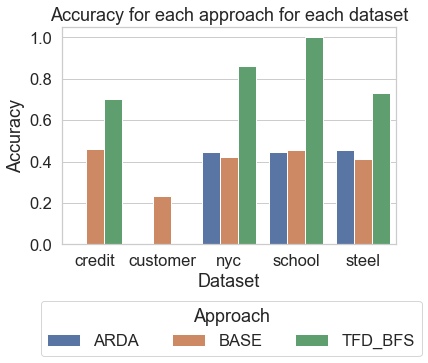

In [27]:

display(accuracy.head())

sns.set(font_scale=1.5, style="whitegrid")
colors = sns.color_palette("Set2")

ax = sns.barplot(data=accuracy, x="data_label", y="accuracy", hue="approach")

ax.set_xlabel('Dataset')
ax.set_ylabel('Accuracy')

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

plt.legend(hh, ll, bbox_to_anchor=(1.1, -0.55), loc=4, ncol=3, title="Approach")
ax.set_title("Accuracy for each approach for each dataset")

# plt.savefig('plots/2024/accuracy_1.png', dpi=300, bbox_inches="tight")




## Accuracy all algorithms

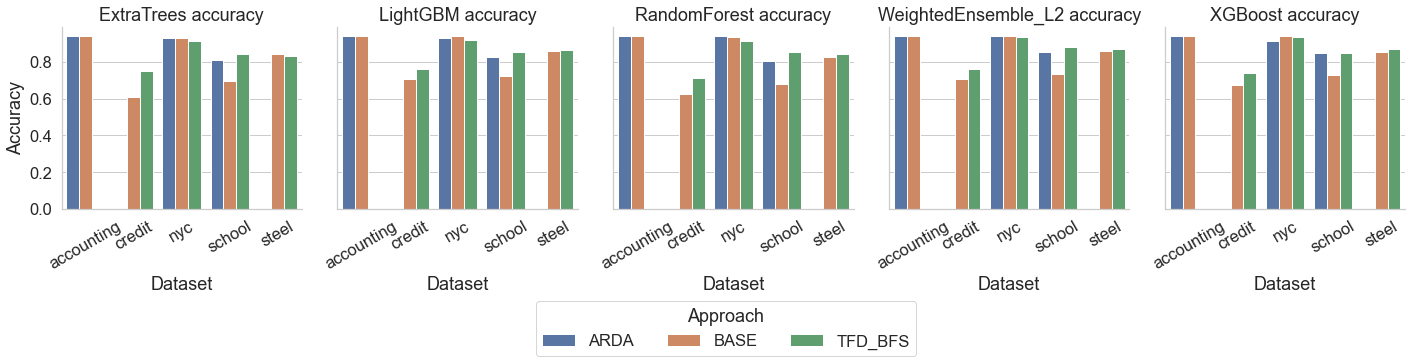

In [65]:
sns.set(font_scale=1.5, style="whitegrid")
# plt.subplots(figsize=(20, 4))

g = sns.catplot(x="data_label", y="accuracy", hue="approach", col="algorithm", 
                data=accuracy, kind="bar", height=4, aspect=1)

g.set_titles("{col_name} accuracy")
g.set_xlabels('Dataset')
g.set_ylabels('Accuracy')

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

g.set_xticklabels(labels, rotation=30)
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(-1, -0.85), loc=4, ncol=3, title="Approach")

g.savefig('plots/2024/accuracy_autogluon.png', dpi=300, bbox_inches="tight")


## Total time - one algorithm

,data_label,approach,accuracy
0,credit,TFD_BFS,0.702500
1,nyc,TFD_BFS,0.863231
2,school,TFD_BFS,1.000000
3,steel,TFD_BFS,0.729417
0,credit,BASE,0.463266


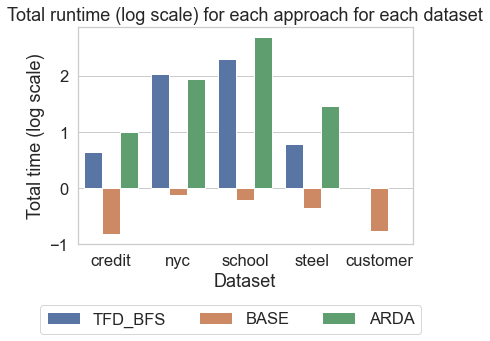

In [99]:


display(total_time.head())

sns.set(font_scale=1.5, style="whitegrid")
colors = sns.color_palette("Set2")

# g = sns.catplot(x="data_label", y="accuracy", hue="approach", data=accuracy, kind="bar", height=4,
#                order=algs)

ax = sns.barplot(data=total_time, x="data_label", y="total_time", hue="approach")


# g.set_titles("{col_name}")
ax.set_xlabel('Dataset')
ax.set_ylabel('Total time (log scale)')

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

# g.set_xticklabels(labels, rotation=30)
# g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(1.05, -0.45), loc=4, ncol=3)
ax.set_title("Total runtime (log scale) for each approach for each dataset")

# plt.savefig('plots/2024/total_time_1.png', dpi=300, bbox_inches="tight")



## Total time - all algorithms

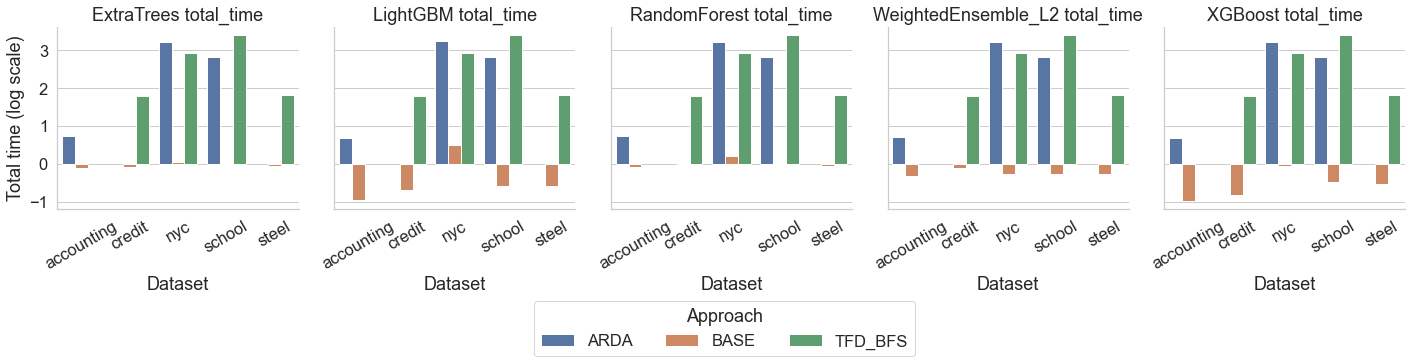

In [64]:
sns.set(font_scale=1.5, style="whitegrid")
# plt.subplots(figsize=(20, 4))

g = sns.catplot(x="data_label", y="total_time", hue="approach", col="algorithm", 
                data=total_time, kind="bar", height=4, aspect=1)

g.set_titles("{col_name} total_time")
g.set_xlabels('Dataset')
g.set_ylabels('Total time (log scale)')

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

g.set_xticklabels(labels, rotation=30)
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(-1, -0.85), loc=4, ncol=3, title="Approach")

g.savefig('plots/2024/total_time_autogluon.png', dpi=300, bbox_inches="tight")


## Features - one algorithm

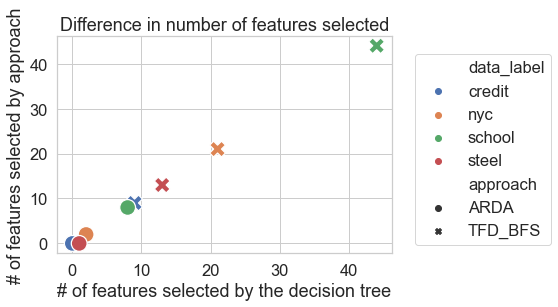

In [100]:
sns.set(font_scale=1.5, style="whitegrid")
colors = sns.color_palette("Set2")

ax = sns.scatterplot(data=feat_df, x="number_features_importance", 
                     y="number_join_path_features", hue="data_label", 
                     style="approach", s=250)

ax.set_xlabel("# of features selected by the decision tree")
ax.set_ylabel("# of features selected by approach")
ax.set_title("Difference in number of features selected")

hh, ll = plt.gca().get_legend_handles_labels()
plt.legend(hh, ll, bbox_to_anchor=(1.5, 0), loc=4, ncol=1)

# plt.savefig('plots/2024/nr_features_1.png', dpi=300, bbox_inches="tight")



## Features - all algorithms

In [ ]:
sns.set(font_scale=1.5, style="whitegrid")
# plt.subplots(figsize=(20, 4))

g = sns.catplot(x="data_label", y="total_time", hue="approach", col="algorithm", 
                data=total_time, kind="bar", height=4, aspect=1.5)

g.set_titles("{col_name} total_time")
g.set_xlabels('Dataset')
g.set_ylabels('Total time (log scale)')

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

g.set_xticklabels(labels, rotation=30)
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(0.7, -1.3), loc=4, ncol=3, title="Approach")

# g.savefig('plots/accuracy-all-big.pdf', dpi=300, bbox_inches="tight")


# 6. Tune threshold - value_ratio

## Analyse data

In [41]:
# read data

value_ratio_result_fileine = "all_results_value_ratio_tuning.csv"
filepath_vr = os.path.join(folder_name, f"{dataset_path}/{value_ratio_result_fileine}")

df_vr = pd.read_csv(filepath_vr)
df_vr.drop(columns=['join_time', 'depth', 'redundancy_threshold', 'rank', 'algorithm', 'approach'], inplace=True)

df_vr

,data_path,data_label,total_time,feature_selection_time,accuracy,train_time,feature_importance,join_path_features,cutoff_threshold
0,housing.csv--Borough-capital_projects2.csv,nyc,67.596903,NaN,0.776199,1.294166,"{'capital_projects2.csv.Project Name': 0.002, ...","['capital_projects2.csv.Project Name', 'capita...",0.15
1,housing.csv--ZipCode(s)-film_permits.csv,nyc,67.596903,NaN,0.852130,2.026331,"{'film_permits.csv.EndDateTime': 0.014, 'film_...","['film_permits.csv.EndDateTime', 'film_permits...",0.15
2,base.csv--DBN-math.csv,school,213.776966,NaN,0.704695,1.817757,"{'math.csv.Level 2 #': 0.0, 'math.csv.Level 4 ...","['math.csv.Level 2 #', 'math.csv.Level 4 #', '...",0.15
3,base.csv--DBN-qr.csv,school,213.776966,NaN,0.701878,0.646538,"{'qr.csv.DBN': 0.0, 'base.csv.School Name': 0....","['qr.csv.DBN', 'base.csv.School Name', 'base.c...",0.15
4,base.csv--DBN-gender.csv--DBN-disc.csv,school,213.776966,NaN,0.707527,2.003247,"{'disc.csv.ADMINISTRATIVE DISTRICT': 0.0, 'dis...","['disc.csv.ADMINISTRATIVE DISTRICT', 'disc.csv...",0.15
...,...,...,...,...,...,...,...,...,...
162,table10.csv--V3-table2.csv--V24-table8.csv--V2...,steel,28.494592,NaN,0.800261,2.228764,"{'table4.csv.V16': 0.011, 'table4.csv.V25': 0....","['table4.csv.V16', 'table4.csv.V25', 'table4.c...",0.95
163,housing.csv--Borough-film_permits.csv,nyc,50.908460,NaN,0.833256,1.689204,"{'film_permits.csv.EndDateTime': 0.0, 'film_pe...","['film_permits.csv.EndDateTime', 'film_permits...",1.00
164,housing.csv--Borough-capital_projects2.csv,nyc,50.908460,NaN,0.780428,1.091349,"{'capital_projects2.csv.Project Name': 0.038, ...","['capital_projects2.csv.Project Name', 'capita...",1.00
165,base.csv--DBN-2013_NYC_School_Survey.csv,school,36.926676,NaN,1.000000,0.994501,{'2013_NYC_School_Survey.csv.Total Communicati...,['2013_NYC_School_Survey.csv.Total Communicati...,1.00


## Fix time 

In [42]:
df_vr['feature_selection_time'] = df_vr['total_time']
df_vr['total_time'] = df_vr['feature_selection_time'] + df_vr['train_time']
df_vr

,data_path,data_label,total_time,feature_selection_time,accuracy,train_time,feature_importance,join_path_features,cutoff_threshold
0,housing.csv--Borough-capital_projects2.csv,nyc,68.891069,67.596903,0.776199,1.294166,"{'capital_projects2.csv.Project Name': 0.002, ...","['capital_projects2.csv.Project Name', 'capita...",0.15
1,housing.csv--ZipCode(s)-film_permits.csv,nyc,69.623234,67.596903,0.852130,2.026331,"{'film_permits.csv.EndDateTime': 0.014, 'film_...","['film_permits.csv.EndDateTime', 'film_permits...",0.15
2,base.csv--DBN-math.csv,school,215.594723,213.776966,0.704695,1.817757,"{'math.csv.Level 2 #': 0.0, 'math.csv.Level 4 ...","['math.csv.Level 2 #', 'math.csv.Level 4 #', '...",0.15
3,base.csv--DBN-qr.csv,school,214.423504,213.776966,0.701878,0.646538,"{'qr.csv.DBN': 0.0, 'base.csv.School Name': 0....","['qr.csv.DBN', 'base.csv.School Name', 'base.c...",0.15
4,base.csv--DBN-gender.csv--DBN-disc.csv,school,215.780213,213.776966,0.707527,2.003247,"{'disc.csv.ADMINISTRATIVE DISTRICT': 0.0, 'dis...","['disc.csv.ADMINISTRATIVE DISTRICT', 'disc.csv...",0.15
...,...,...,...,...,...,...,...,...,...
162,table10.csv--V3-table2.csv--V24-table8.csv--V2...,steel,30.723356,28.494592,0.800261,2.228764,"{'table4.csv.V16': 0.011, 'table4.csv.V25': 0....","['table4.csv.V16', 'table4.csv.V25', 'table4.c...",0.95
163,housing.csv--Borough-film_permits.csv,nyc,52.597664,50.908460,0.833256,1.689204,"{'film_permits.csv.EndDateTime': 0.0, 'film_pe...","['film_permits.csv.EndDateTime', 'film_permits...",1.00
164,housing.csv--Borough-capital_projects2.csv,nyc,51.999809,50.908460,0.780428,1.091349,"{'capital_projects2.csv.Project Name': 0.038, ...","['capital_projects2.csv.Project Name', 'capita...",1.00
165,base.csv--DBN-2013_NYC_School_Survey.csv,school,37.921177,36.926676,1.000000,0.994501,{'2013_NYC_School_Survey.csv.Total Communicati...,['2013_NYC_School_Survey.csv.Total Communicati...,1.00


## Process data

In [51]:
number_of_features, features = parse_feature_importance(df_vr)
df_vr['number_features_importance'] = number_of_features

number_of_features, jp_features = parse_join_path_features(df_vr)
df_vr['number_join_path_features'] = number_of_features

nr_common_features, difference = determine_common_features(df_vr)
df_vr['nr_common_features'] = nr_common_features
df_vr['different_features'] = difference

df_vr

[11, 19, 20, 6, 23, 8, 37, 22, 12, 19, 11, 19, 20, 6, 29, 8, 42, 37, 41, 22, 12, 7, 28, 11, 19, 20, 37, 22, 41, 12, 9, 24, 11, 19, 20, 23, 22, 12, 9, 16, 11, 19, 23, 20, 6, 47, 23, 8, 22, 22, 56, 12, 7, 9, 27, 11, 19, 8, 20, 6, 44, 22, 22, 12, 9, 20, 11, 19, 8, 20, 37, 22, 22, 12, 16, 11, 19, 23, 20, 44, 20, 22, 12, 7, 9, 20, 11, 19, 8, 20, 23, 22, 22, 56, 12, 9, 24, 11, 19, 20, 6, 23, 22, 22, 56, 12, 9, 16, 11, 19, 6, 29, 8, 22, 22, 12, 7, 9, 16, 11, 19, 22, 22, 12, 7, 23, 11, 19, 29, 8, 22, 22, 14, 7, 9, 16, 11, 16, 22, 22, 12, 7, 28, 16, 11, 18, 15, 22, 12, 8, 9, 14, 16, 11, 22, 12, 17, 16, 11, 22, 12, 9, 22, 16, 11, 12, 16]
[11, 19, 20, 6, 23, 8, 37, 22, 12, 19, 11, 19, 20, 6, 29, 8, 42, 37, 41, 22, 12, 7, 28, 11, 19, 20, 37, 22, 41, 12, 9, 24, 11, 19, 20, 23, 22, 12, 9, 16, 11, 19, 23, 20, 6, 47, 23, 8, 22, 22, 56, 12, 7, 9, 27, 11, 19, 8, 20, 6, 44, 22, 22, 12, 9, 20, 11, 19, 8, 20, 37, 22, 22, 12, 16, 11, 19, 23, 20, 44, 20, 22, 12, 7, 9, 20, 11, 19, 8, 20, 23, 22, 22, 56, 12, 9

,data_path,data_label,total_time,feature_selection_time,accuracy,train_time,feature_importance,join_path_features,cutoff_threshold,number_features_importance,number_join_path_features,nr_common_features,different_features
0,housing.csv--Borough-capital_projects2.csv,nyc,68.891069,67.596903,0.776199,1.294166,"{'capital_projects2.csv.Project Name': 0.002, ...","['capital_projects2.csv.Project Name', 'capita...",0.15,11,11,11,{}
1,housing.csv--ZipCode(s)-film_permits.csv,nyc,69.623234,67.596903,0.852130,2.026331,"{'film_permits.csv.EndDateTime': 0.014, 'film_...","['film_permits.csv.EndDateTime', 'film_permits...",0.15,19,19,19,{}
2,base.csv--DBN-math.csv,school,215.594723,213.776966,0.704695,1.817757,"{'math.csv.Level 2 #': 0.0, 'math.csv.Level 4 ...","['math.csv.Level 2 #', 'math.csv.Level 4 #', '...",0.15,20,20,20,{}
3,base.csv--DBN-qr.csv,school,214.423504,213.776966,0.701878,0.646538,"{'qr.csv.DBN': 0.0, 'base.csv.School Name': 0....","['qr.csv.DBN', 'base.csv.School Name', 'base.c...",0.15,6,6,6,{}
4,base.csv--DBN-gender.csv--DBN-disc.csv,school,215.780213,213.776966,0.707527,2.003247,"{'disc.csv.ADMINISTRATIVE DISTRICT': 0.0, 'dis...","['disc.csv.ADMINISTRATIVE DISTRICT', 'disc.csv...",0.15,23,23,23,{}
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,table10.csv--V3-table2.csv--V24-table8.csv--V2...,steel,30.723356,28.494592,0.800261,2.228764,"{'table4.csv.V16': 0.011, 'table4.csv.V25': 0....","['table4.csv.V16', 'table4.csv.V25', 'table4.c...",0.95,22,22,22,{}
163,housing.csv--Borough-film_permits.csv,nyc,52.597664,50.908460,0.833256,1.689204,"{'film_permits.csv.EndDateTime': 0.0, 'film_pe...","['film_permits.csv.EndDateTime', 'film_permits...",1.00,16,16,16,{}
164,housing.csv--Borough-capital_projects2.csv,nyc,51.999809,50.908460,0.780428,1.091349,"{'capital_projects2.csv.Project Name': 0.038, ...","['capital_projects2.csv.Project Name', 'capita...",1.00,11,11,11,{}
165,base.csv--DBN-2013_NYC_School_Survey.csv,school,37.921177,36.926676,1.000000,0.994501,{'2013_NYC_School_Survey.csv.Total Communicati...,['2013_NYC_School_Survey.csv.Total Communicati...,1.00,12,12,12,{}


## Plot

In [55]:
threshold = df_vr.groupby(['cutoff_threshold', 'data_label'])[['total_time', 'accuracy']].max().reset_index()
threshold 


,cutoff_threshold,data_label,total_time,accuracy
0,0.15,nyc,69.623234,0.852130
1,0.15,school,217.171951,1.000000
2,0.15,steel,23.865264,0.777713
3,0.20,nyc,63.183314,0.851685
4,0.20,school,318.169488,1.000000
...,...,...,...,...
60,0.95,school,44.272763,1.000000
61,0.95,steel,30.723356,0.800261
62,1.00,nyc,52.597664,0.833256
63,1.00,school,37.921177,1.000000


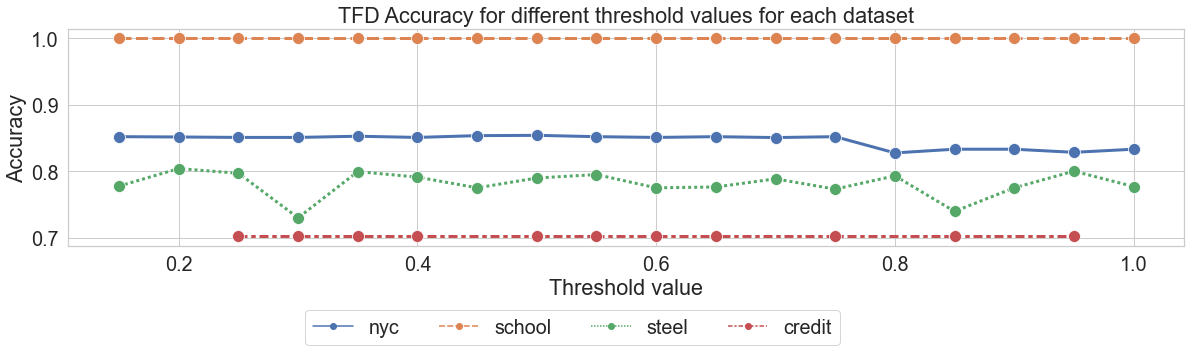

In [84]:
sns.set(font_scale=1.8, style="whitegrid")
plt.subplots(figsize=(20, 4))

# ax = sns.barplot(data=threshold, x="cutoff_threshold", y="accuracy", hue="data_label")

# ax = sns.scatterplot(data=threshold, x="cutoff_threshold", 
#                      y="accuracy",  
#                      style="data_label", s=250)
ax = sns.lineplot(data=threshold, x="cutoff_threshold", 
                     y="accuracy", hue="data_label",
                     style="data_label", markers=['o','o','o','o'], markersize=12, linewidth=3)

ax.set_xlabel('Threshold value')
ax.set_ylabel('Accuracy')

hh, ll = plt.gca().get_legend_handles_labels()

plt.legend(hh, ll, bbox_to_anchor=(0.7, -0.5), loc=4, ncol=4)
ax.set_title("TFD Accuracy for different threshold values for each dataset")

plt.savefig('plots/2024/threshold_1.png', dpi=300, bbox_inches="tight")


# 7. Ablation

## Read data

In [147]:
# read data

ablation_filename = "ablation_study_0.5.csv"
filepath_abl = os.path.join(folder_name, f"{dataset_path}/{ablation_filename}")

ablation = pd.read_csv(filepath_abl)

ablation

,study,nyc_paths,nyc_runtime,school_paths,school_runtime,credit_paths,credit_runtime,steel_paths,steel_runtime
0,enumerate,11,16.090323,1104,1.818853,1,0.365223,139,0.456157
1,enumerate_join,11,97.804418,1104,894.550517,1,2.249067,139,70.750071
2,enumerate_prune,5,68.508469,76,103.639486,1,3.243296,139,76.397723
3,enumerate_join_prune_fs,5,94.340995,76,1100.108041,1,2.793950,69,161.210917
4,enumerate_join_prune_fs_rank_jk,5,103.161171,41,1012.976641,1,3.443817,38,176.144711


## Create dataframes for plots

In [148]:
ablation_paths = ablation[['study', 'nyc_paths', 'school_paths', 'credit_paths', 'steel_paths']]
ablation_paths = ablation_paths.set_index('study').stack().reset_index(name="value").rename(columns={'level_1': 'type'})
ablation_paths

,study,type,value
0,enumerate,nyc_paths,11
1,enumerate,school_paths,1104
2,enumerate,credit_paths,1
3,enumerate,steel_paths,139
4,enumerate_join,nyc_paths,11
5,enumerate_join,school_paths,1104
6,enumerate_join,credit_paths,1
7,enumerate_join,steel_paths,139
8,enumerate_prune,nyc_paths,5
9,enumerate_prune,school_paths,76


In [149]:
ablation_runtime = ablation[['study', 'nyc_runtime', 'school_runtime', 'credit_runtime', 'steel_runtime']]
ablation_runtime = ablation_runtime.set_index('study').stack().reset_index(name="value").rename(columns={'level_1': 'type'})
ablation_runtime

,study,type,value
0,enumerate,nyc_runtime,16.090323
1,enumerate,school_runtime,1.818853
2,enumerate,credit_runtime,0.365223
3,enumerate,steel_runtime,0.456157
4,enumerate_join,nyc_runtime,97.804418
5,enumerate_join,school_runtime,894.550517
6,enumerate_join,credit_runtime,2.249067
7,enumerate_join,steel_runtime,70.750071
8,enumerate_prune,nyc_runtime,68.508469
9,enumerate_prune,school_runtime,103.639486


## Plots

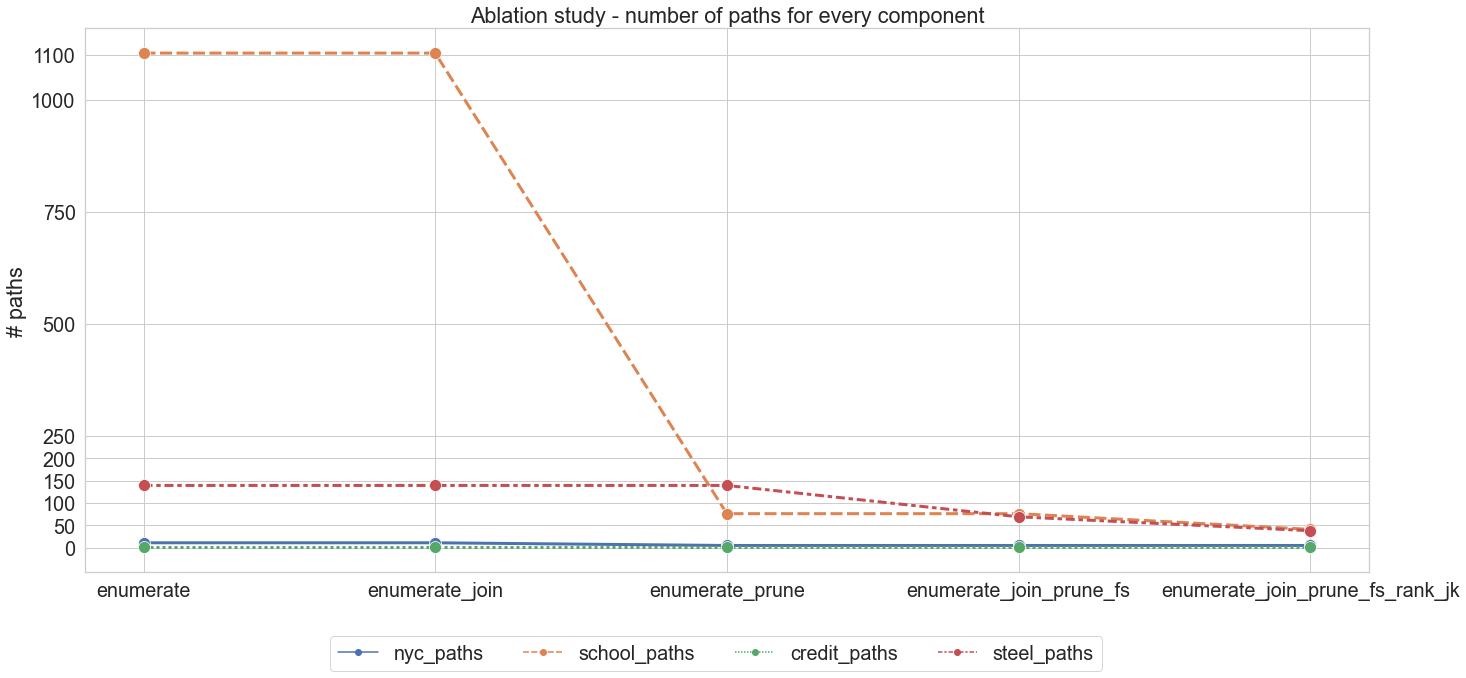

In [152]:
sns.set(font_scale=1.8, style="whitegrid")
plt.subplots(figsize=(23, 10))

ax = sns.lineplot(data=ablation_paths, x="study", 
                     y="value", hue="type",
                     style="type", markers=['o','o','o','o'], markersize=12, linewidth=3)

ax.set_xlabel('')
ax.set_ylabel('# paths')

ax.set_yticks([0, 50, 100, 150, 200, 250, 500, 750, 1000, 1100])


hh, ll = plt.gca().get_legend_handles_labels()

plt.legend(hh, ll, bbox_to_anchor=(0.8, -0.2), loc=4, ncol=4)
ax.set_title("Ablation study - number of paths for every component")

plt.savefig('plots/2024/ablation_paths_1.png', dpi=300, bbox_inches="tight")


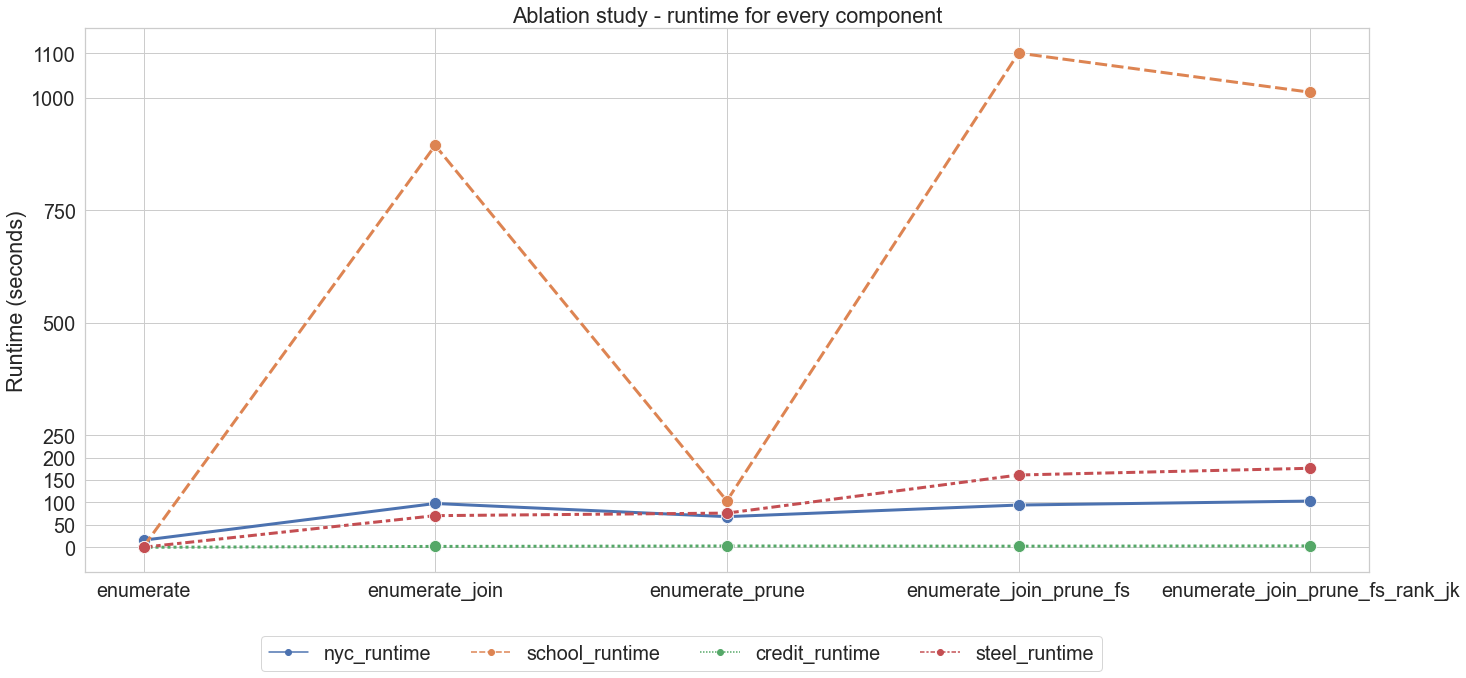

In [153]:
sns.set(font_scale=1.8, style="whitegrid")
plt.subplots(figsize=(23, 10))

ax = sns.lineplot(data=ablation_runtime, x="study", 
                     y="value", hue="type",
                     style="type", markers=['o','o','o','o'], markersize=12, linewidth=3)

ax.set_xlabel('')
ax.set_ylabel('Runtime (seconds)')

ax.set_yticks([0, 50, 100, 150, 200, 250, 500, 750, 1000, 1100])


hh, ll = plt.gca().get_legend_handles_labels()

plt.legend(hh, ll, bbox_to_anchor=(0.8, -0.2), loc=4, ncol=4)
ax.set_title("Ablation study - runtime for every component")

plt.savefig('plots/2024/ablation_runtime_1.png', dpi=300, bbox_inches="tight")


In [3]:
# get original (base) table name from dataset name 

def shorten_dataset_name_join(data):
    if 'other-data' in data:
        partition = data.partition('other-data')[2]
        split = partition.split('/')[-1]
    else:
        split = data.split('/')[0]
    return split

def half_time(data):
    if 'other-data' in data:
        partition = data.partition('other-data')[2]
        split = partition.split('/')[-1]
    else:
        split = data.split('/')[0]
    return split

dataframe['dataset'] = dataframe['data_path'].apply(lambda x: shorten_dataset_name_join(x))

dataframe


,approach,data_path,algorithm,depth,accuracy,join_time,train_time,total_time,feature_importances,fs_time,dataset
0,all-in-path,football/football.csv/id--football/differences...,CART,2.0,0.798761,2.075651,0.081938,2.157589,{'strong_score': 1.0},NaN,football
1,all-in-path,football/football.csv/id--football/differences...,ID3,2.0,0.519043,2.075651,269.792025,271.867676,{},NaN,football
2,all-in-path,football/football.csv/id--football/differences...,XGBoost,1.0,0.784404,2.075651,0.772123,2.847774,"{'date': 0.033, 'weak_team': 0.018, 'dif_overa...",NaN,football
3,best-ranked,football/football.csv/id--football/differences...,CART,4.0,0.785202,2.075651,0.087464,2.163115,"{'date': 0.022, 'dif_midfield': 0.016, 'id': 0...",NaN,football
4,best-ranked,football/football.csv/id--football/differences...,ID3,4.0,0.528358,2.075651,173.252891,175.328542,{},NaN,football
...,...,...,...,...,...,...,...,...,...,...,...
103,non-aug,other-data/decision-trees-split/titanic,ID3,2.0,0.383783,NaN,28.246128,28.246128,{},NaN,titanic
104,non-aug,other-data/decision-trees-split/titanic,XGBoost,1.0,0.562484,NaN,0.140772,0.140772,"{'PassengerId': 0.491, 'TicketId': 0.509}",NaN,titanic
105,non-aug,other-data/data/WebKP 2,CART,1.0,0.470925,NaN,0.012028,0.012028,{'webpage_id': 1.0},NaN,WebKP 2
106,non-aug,other-data/data/WebKP 2,ID3,2.0,0.091131,NaN,13.375112,13.375112,{},NaN,WebKP 2


In [4]:
df1 = dataframe[(dataframe['approach']=='best-ranked') | (dataframe['approach']=='all-in-path')]

df1['join_time'] = dataframe.apply(lambda x: x['join_time']/2, axis=1)
df1['total_time'] = dataframe.apply(lambda x: x['total_time']/2, axis=1)
df1['train_time'] = dataframe.apply(lambda x: x['train_time']/2, axis=1)

df2 = dataframe[(dataframe['approach']!='best-ranked')  & (dataframe['approach']!='all-in-path')]

df = pd.concat([df1, df2])
df['approach'].unique()


/var/folders/qt/6fl05zbd1qg522c_08dv10f40000gn/T/ipykernel_36572/3298512316.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['join_time'] = dataframe.apply(lambda x: x['join_time']/2, axis=1)
/var/folders/qt/6fl05zbd1qg522c_08dv10f40000gn/T/ipykernel_36572/3298512316.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['total_time'] = dataframe.apply(lambda x: x['total_time']/2, axis=1)
/var/folders/qt/6fl05zbd1qg522c_08dv10f40000gn/T/ipykernel_36572/3298512316.py:5: SettingWithCopyWarning: 
A val

array(['all-in-path', 'best-ranked', 'join_all', 'arda', 'join_all_ffs',
       'non-aug'], dtype=object)

In [4]:
best_ranked = dataframe[dataframe['approach']=='best-ranked']
# display(best_ranked)

all_path = dataframe[dataframe['approach']=='all-in-path']
# display(all_path)

join_all = dataframe[dataframe['approach']=='join_all']
# display(join_all)

arda = dataframe[dataframe['approach']=='arda']
# display(best_ranked)

join_all_ffs = dataframe[dataframe['approach']=='join_all_ffs']
# display(all_path)

non_aug = dataframe[dataframe['approach']=='non-aug']
# display(join_all)


best_ranked_df = best_ranked.groupby(['dataset', 'algorithm', 'depth', 'approach'])['total_time'].max().to_frame(name='accuracy').reset_index()
display(best_ranked_df)


,dataset,algorithm,depth,approach,accuracy
0,football,CART,2.0,best-ranked,6.190797
1,football,ID3,4.0,best-ranked,170.645855
2,football,XGBoost,1.0,best-ranked,6.553480
3,steel-plate-fault,CART,9.0,best-ranked,85.162665
4,steel-plate-fault,ID3,4.0,best-ranked,509.314594
5,steel-plate-fault,XGBoost,11.0,best-ranked,89.028154
6,titanic,CART,3.0,best-ranked,0.588195
7,titanic,ID3,2.0,best-ranked,169.759674
8,titanic,XGBoost,1.0,best-ranked,0.890371


In [7]:
# train time
total_time = None
for approach in df['approach'].unique():
    dff = df[df['approach']==approach]
    dff = dff.groupby(['dataset', 'algorithm', 'depth', 'approach'])['total_time'].max().to_frame(name='total_time').reset_index()
    if total_time is None:
        total_time = dff
    else:
        total_time = pd.concat([total_time, dff])
        
display(total_time)

,dataset,algorithm,depth,approach,total_time
0,football,CART,6.0,arda,31.876689
1,football,ID3,4.0,arda,72.093538
2,football,XGBoost,2.0,arda,32.415981
3,steel-plate-fault,CART,4.0,arda,217.050151
4,steel-plate-fault,ID3,8.0,arda,218.328975
5,steel-plate-fault,XGBoost,1.0,arda,217.477362
6,titanic,CART,1.0,arda,5.859683
7,titanic,ID3,2.0,arda,6.029064
8,titanic,XGBoost,1.0,arda,6.085378
0,football,CART,10.0,join_all,0.408521


In [8]:
depth = None
for approach in dataframe['approach'].unique():
    dff = dataframe[dataframe['approach']==approach]
    dff = dff.groupby(['dataset', 'algorithm', 'approach'])['depth'].max().to_frame(name='depth').reset_index()
    if depth is None:
        depth = dff
    else:
        depth = pd.concat([depth, dff])

In [9]:
join_time = None
for approach in df['approach'].unique():
    dff = df[df['approach']==approach]
    dff = df[(df['dataset']!='PubMed_Diabetes') & (df['dataset']!='CiteSeer') & (df['dataset']!='CORA')]
    dff = dff.groupby(['dataset', 'algorithm', 'depth', 'approach'])['join_time'].max().to_frame(name='join_time').reset_index()
    if join_time is None:
        join_time = dff
    else:
        join_time = pd.concat([join_time, dff])

In [10]:
# Separate into 2 datasets
small_datasets = ['football', 'steel-plate-fault', 'titanic']
big_datasets = ['CORA', 'WebKP 2', 'CiteSeer']

,dataset,algorithm,depth,approach,accuracy
3,CiteSeer,CART,2.0,best-ranked,0.230067
13,football,ID3,4.0,best-ranked,0.528358
16,steel-plate-fault,ID3,4.0,best-ranked,0.355155
4,CiteSeer,ID3,2.0,best-ranked,0.201704
19,titanic,ID3,2.0,best-ranked,0.383783


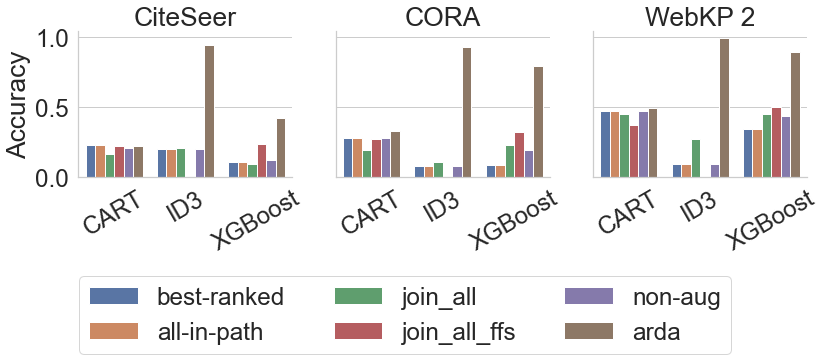

In [16]:
# Accuracy of BestRank, JoinAll and Non-Aug

# BIG DATASETS

display(accuracy.head())

label_order = {'best-ranked': 0, 'all-in-path': 1, 'join_all': 2, 'join_all_ffs': 3, 'non-aug': 4, 'arda': 5}

accuracy.sort_values(by=['algorithm'], ascending=True, inplace=True)
accuracy.sort_values(by=['approach'], key=lambda x: x.map(label_order), inplace=True)

accuracy_filtered = accuracy[accuracy["dataset"].isin(big_datasets)]
# accuracy_filtered = accuracy_filtered[accuracy_filtered["approach"] != "arda"]


sns.set(font_scale=2.2, style="whitegrid")
colors = sns.color_palette("Set2")

g = sns.catplot(x="algorithm", y="accuracy", hue="approach", col="dataset", data=accuracy_filtered, kind="bar", height=4,
               order=algs)

g.set_titles("{col_name}")
g.set_xlabels('')
g.set_ylabels('Accuracy')

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

g.set_xticklabels(labels, rotation=30)
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(0.7, -1.3), loc=4, ncol=3)

g.savefig('plots/accuracy-all-big.pdf', dpi=300, bbox_inches="tight")




,dataset,algorithm,depth,approach,total_time
0,football,CART,2.0,best-ranked,6.190797
1,football,ID3,4.0,best-ranked,170.645855
2,football,XGBoost,1.0,best-ranked,6.553480
3,steel-plate-fault,CART,9.0,best-ranked,85.162665
4,steel-plate-fault,ID3,4.0,best-ranked,509.314594


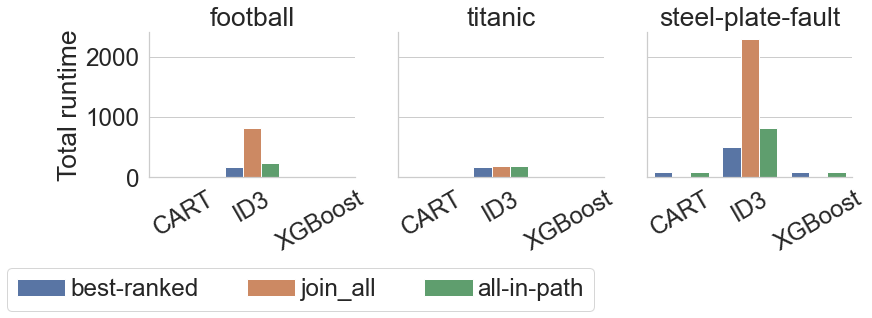

In [16]:
# Accuracy of BestRank, JoinAll and Non-Aug

best_ranked = df[df['approach']=='best-ranked']
# display(best_ranked)

all_path = df[df['approach']=='all-in-path']
# display(all_path)

join_all = df[df['approach']=='join_all']
# display(join_all)

best_ranked_df = best_ranked.groupby(['dataset', 'algorithm', 'depth', 'approach'])['total_time'].max().to_frame(name='total_time').reset_index()

all_path_df = all_path.groupby(['dataset', 'algorithm', 'depth', 'approach'])['total_time'].max().to_frame(name='total_time').reset_index()

join_all_df = join_all.groupby(['dataset', 'algorithm', 'depth', 'approach'])['total_time'].max().to_frame(name='total_time').reset_index()

concat_df = pd.concat([best_ranked_df, all_path_df, join_all_df])

display(concat_df.head())

# label_order = {'best-ranked': 0, 'all-in-path': 1, 'join_all': 2}

concat_df.sort_values(by=['algorithm'], ascending=True, inplace=True)
# concat_df.sort_values(by=['approach'], key=lambda x: x.map(label_order), inplace=True)


sns.set(font_scale=2.2, style="whitegrid")
colors = sns.color_palette("Set2")

g = sns.catplot(x="algorithm", y="total_time", hue="approach", col="dataset", data=concat_df, kind="bar", height=4,
               order=algs)

g.set_titles("{col_name}")
g.set_xlabels('')
g.set_ylabels('Total runtime')

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

g.set_xticklabels(labels, rotation=30)
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(-0.2, -1), loc=4, ncol=3, handletextpad=0.2)

g.savefig('plots/runtime-all.pdf', dpi=300, bbox_inches="tight")





,dataset,algorithm,depth,approach,join_time
0,football,CART,1.0,non-aug,NaN
18,steel-plate-fault,CART,6.0,all-in-path,85.046816
19,steel-plate-fault,CART,6.0,join_all,0.186446
20,steel-plate-fault,CART,6.0,non-aug,NaN
21,steel-plate-fault,CART,9.0,best-ranked,85.046816
...,...,...,...,...,...
49,titanic,XGBoost,2.0,join_all,0.064785
11,football,XGBoost,1.0,all-in-path,6.125426
12,football,XGBoost,1.0,best-ranked,6.125426
45,titanic,XGBoost,1.0,all-in-path,0.513113


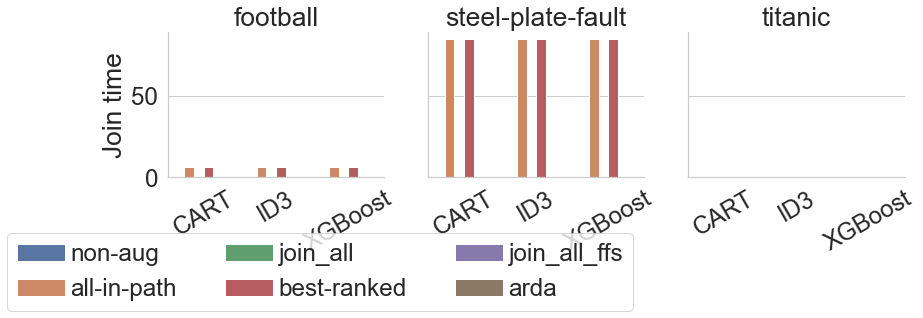

In [17]:



# label_order = {'best-ranked': 0, 'all-in-path': 1, 'join_all': 2}

### SMALL DATASETS JOIN TIME

join_time.sort_values(by=['algorithm'], ascending=True, inplace=True)
# join_time.sort_values(by=['approach'], key=lambda x: x.map(label_order), inplace=True)
join_time_filtered = join_time[join_time['dataset'].isin(small_datasets)]

display(join_time)


sns.set(font_scale=2.2, style="whitegrid")
colors = sns.color_palette("Set2")

g = sns.catplot(x="algorithm", y="join_time", hue="approach", col="dataset", data=join_time_filtered, kind="bar", height=4,
               order=algs)

g.set_titles("{col_name}")
g.set_xlabels('')
g.set_ylabels('Join time')

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

g.set_xticklabels(labels, rotation=30)
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(-0.2, -1), loc=4, ncol=3, handletextpad=0.2)

g.savefig('plots/join-time-all.pdf', dpi=300, bbox_inches="tight")




In [18]:
train_time = None
for approach in df['approach'].unique():
    dff = df[df['approach']==approach]
#     dff = dataframe[(dataframe['dataset']!='PubMed_Diabetes') & (dataframe['dataset']!='CiteSeer') & (dataframe['dataset']!='CORA')]
    dff = dff.groupby(['dataset', 'algorithm', 'approach'])['train_time'].max().to_frame(name='train_time').reset_index()
    if train_time is None:
        train_time = dff
    else:
        train_time = pd.concat([train_time, dff])

,dataset,algorithm,approach,train_time
0,football,CART,arda,-2.721879+0.000000j
3,steel-plate-fault,CART,arda,-2.811296+0.000000j
6,titanic,CART,best-ranked,-2.589174+0.000000j
6,titanic,CART,arda,-2.680222+0.000000j
3,steel-plate-fault,CART,best-ranked,-2.155470+0.000000j
0,football,CART,best-ranked,-2.727676+0.000000j
4,steel-plate-fault,ID3,arda,0.291886+0.000000j
7,titanic,ID3,arda,-1.435784+0.000000j
1,football,ID3,arda,3.695920+0.000000j
1,football,ID3,best-ranked,5.103035+0.000000j


/Users/andra/Developer/auto-data-augmentation/ada/lib/python3.8/site-packages/matplotlib/transforms.py:774: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)
/Users/andra/Developer/auto-data-augmentation/ada/lib/python3.8/site-packages/matplotlib/transforms.py:774: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)
/Users/andra/Developer/auto-data-augmentation/ada/lib/python3.8/site-packages/matplotlib/transforms.py:774: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)
/Users/andra/Developer/auto-data-augmentation/ada/lib/python3.8/site-packages/matplotlib/transforms.py:774: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


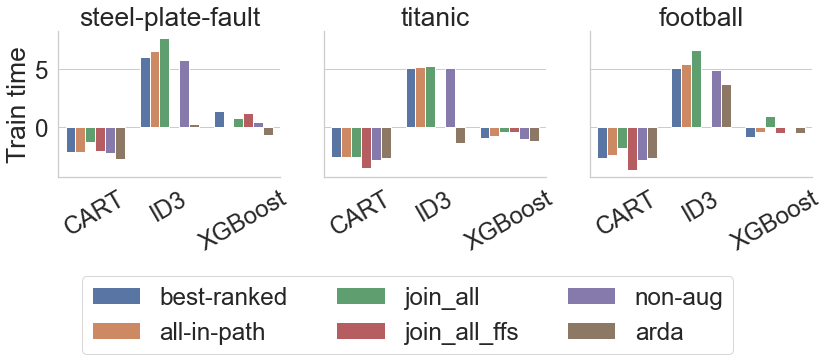

In [20]:
# Accuracy of BestRank, JoinAll and Non-Aug
from cmath import log

# display(train_time)

#### TRAIN TIME small datasets
label_order = {'best-ranked': 0, 'all-in-path': 1, 'join_all': 2, 'join_all_ffs': 3, 'non-aug': 4, 'arda': 5}

train_time.sort_values(by=['algorithm'], ascending=True, inplace=True)
train_time_filtered = train_time[train_time['dataset'].isin(small_datasets)]
train_time_filtered['train_time'] = train_time_filtered.apply(lambda row: log(row['train_time']), axis=1)
display(train_time_filtered[(train_time_filtered['approach'] == 'best-ranked') | (train_time_filtered['approach'] == 'arda')])
train_time_filtered.sort_values(by=['approach'], key=lambda x: x.map(label_order), inplace=True)


sns.set(font_scale=2.2, style="whitegrid")
colors = sns.color_palette("Set2")

g = sns.catplot(x="algorithm", y="train_time", hue="approach", col="dataset", data=train_time_filtered, kind="bar", height=4,
               order=algs)

g.set_titles("{col_name}")
g.set_xlabels('')
g.set_ylabels('Train time')

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

g.set_xticklabels(labels, rotation=30)
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(0.7, -1.3), loc=4, ncol=3)

g.savefig('plots/train-time-all-small.pdf', dpi=300, bbox_inches="tight")

/var/folders/qt/6fl05zbd1qg522c_08dv10f40000gn/T/ipykernel_36572/193570243.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_time_filtered['train_time'] = train_time_filtered.apply(lambda row: log(row['train_time']), axis=1)
/Users/andra/Developer/auto-data-augmentation/ada/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/Users/andra/Developer/auto-data-augmentation/ada/lib/python3.8/site-packages/matplotlib/transforms.py:774: ComplexWarning: Casting complex values to 

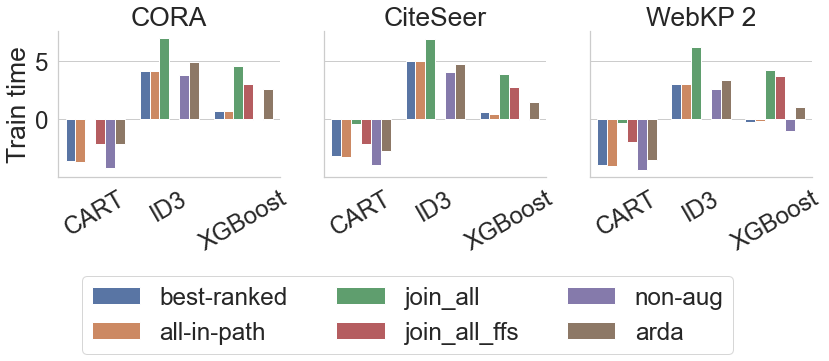

In [27]:
# Accuracy of BestRank, JoinAll and Non-Aug

from cmath import log
# display(train_time)

#### TRAIN TIME BIG datasets
train_time_filtered
train_time.sort_values(by=['algorithm'], ascending=True, inplace=True)
train_time_filtered = train_time[train_time['dataset'].isin(big_datasets)]
# train_time_filtered = train_time_filtered[train_time_filtered['approach'] != 'join_all']
train_time_filtered['train_time'] = train_time_filtered.apply(lambda row: log(row['train_time']), axis=1)
train_time_filtered.sort_values(by=['approach'], key=lambda x: x.map(label_order), inplace=True)


sns.set(font_scale=2.2, style="whitegrid")
colors = sns.color_palette("Set2")

g = sns.catplot(x="algorithm", y="train_time", hue="approach", col="dataset", data=train_time_filtered, kind="bar", height=4,
               order=algs)

g.set_titles("{col_name}")
g.set_xlabels('')
g.set_ylabels('Train time')

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

g.set_xticklabels(labels, rotation=30)
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(0.7, -1.3), loc=4, ncol=3)

g.savefig('plots/train-time-all-big.pdf', dpi=300, bbox_inches="tight")

,dataset,algorithm,approach,depth
0,football,CART,arda,6.0
3,steel-plate-fault,CART,all-in-path,6.0
4,titanic,CART,join_all_ffs,2.0
2,steel-plate-fault,CART,join_all_ffs,13.0
6,titanic,CART,all-in-path,5.0


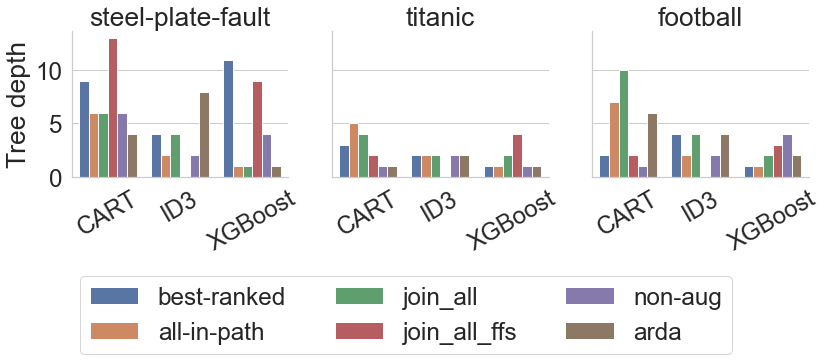

In [17]:

display(depth.head())

# DEPTH SMALL labels
# label_order = {'best-ranked': 0, 'all-in-path': 1, 'join_all': 2}

depth.sort_values(by=['algorithm'], ascending=True, inplace=True)
depth_filtered = depth[depth["dataset"].isin(small_datasets)]
depth_filtered.sort_values(by=['approach'], key=lambda x: x.map(label_order), inplace=True)


sns.set(font_scale=2.2, style="whitegrid")
colors = sns.color_palette("Set2")

g = sns.catplot(x="algorithm", y="depth", hue="approach", col="dataset", data=depth_filtered, kind="bar", height=4,
               order=algs)

g.set_titles("{col_name}")
g.set_xlabels('')
g.set_ylabels('Tree depth')

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

g.set_xticklabels(labels, rotation=30)
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(0.7, -1.3), loc=4, ncol=3)

g.savefig('plots/depth-all-small.png', dpi=300, bbox_inches="tight")





In [16]:
display(depth.head())

# DEPTH BIG labels
# label_order = {'best-ranked': 0, 'all-in-path': 1, 'join_all': 2}

depth.sort_values(by=['algorithm'], ascending=True, inplace=True)
depth_filtered = depth[depth["dataset"].isin(big_datasets)]
depth_filtered.sort_values(by=['approach'], key=lambda x: x.map(label_order), inplace=True)


sns.set(font_scale=2.2, style="whitegrid")
colors = sns.color_palette("Set2")

g = sns.catplot(x="algorithm", y="depth", hue="approach", col="dataset", data=depth_filtered, kind="bar", height=4,
               order=algs)

g.set_titles("{col_name}")
g.set_xlabels('')
g.set_ylabels('Tree depth')

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

g.set_xticklabels(labels, rotation=30)
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(0.7, -1.3), loc=4, ncol=3)

g.savefig('plots/depth-all-big.pdf', dpi=300, bbox_inches="tight")


,dataset,algorithm,approach,depth
0,football,CART,arda,6.0
0,football,CART,all-in-path,7.0
0,football,CART,join_all,10.0
6,titanic,CART,non-aug,1.0
3,steel-plate-fault,CART,arda,4.0


/Users/andra/Developer/auto-data-augmentation/ada/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


ValueError: min() arg is an empty sequence

/Users/andra/Developer/auto-data-augmentation/ada/lib/python3.8/site-packages/matplotlib/transforms.py:774: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)
/Users/andra/Developer/auto-data-augmentation/ada/lib/python3.8/site-packages/matplotlib/transforms.py:774: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)
/Users/andra/Developer/auto-data-augmentation/ada/lib/python3.8/site-packages/matplotlib/transforms.py:774: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.asarray(points, float)


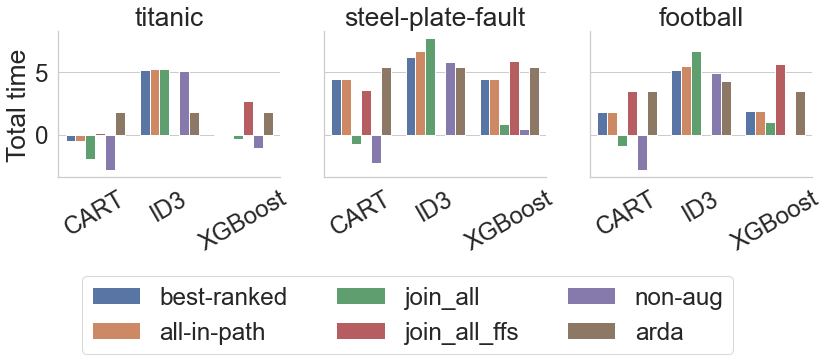

In [15]:
# Accuracy of BestRank, JoinAll and Non-Aug

from cmath import log
# display(train_time)

#### TOTAL TIME SMALL datasets
# label_order = {'best-ranked': 0, 'all-in-path': 1, 'join_all': 2}

total_time.sort_values(by=['algorithm'], ascending=True, inplace=True)
total_time_filtered = total_time[total_time['dataset'].isin(small_datasets)]
# total_time_filtered = total_time_filtered[total_time_filtered['approach'] != 'join_all']
total_time_filtered['total_time'] = total_time_filtered.apply(lambda row: log(row['total_time']), axis=1)
total_time_filtered.sort_values(by=['approach'], key=lambda x: x.map(label_order), inplace=True)


sns.set(font_scale=2.2, style="whitegrid")
colors = sns.color_palette("Set2")

g = sns.catplot(x="algorithm", y="total_time", hue="approach", col="dataset", data=total_time_filtered, kind="bar", height=4,
               order=algs)

g.set_titles("{col_name}")
g.set_xlabels('')
g.set_ylabels('Total time')

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

g.set_xticklabels(labels, rotation=30)
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(0.7, -1.3), loc=4, ncol=3)

g.savefig('plots/total-time-all-small.png', dpi=300, bbox_inches="tight")

/var/folders/qt/6fl05zbd1qg522c_08dv10f40000gn/T/ipykernel_36572/1755753810.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_time_filtered['total_time'] = total_time_filtered.apply(lambda row: log(row['total_time']), axis=1)
/Users/andra/Developer/auto-data-augmentation/ada/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/Users/andra/Developer/auto-data-augmentation/ada/lib/python3.8/site-packages/matplotlib/transforms.py:774: ComplexWarning: Casting complex values to

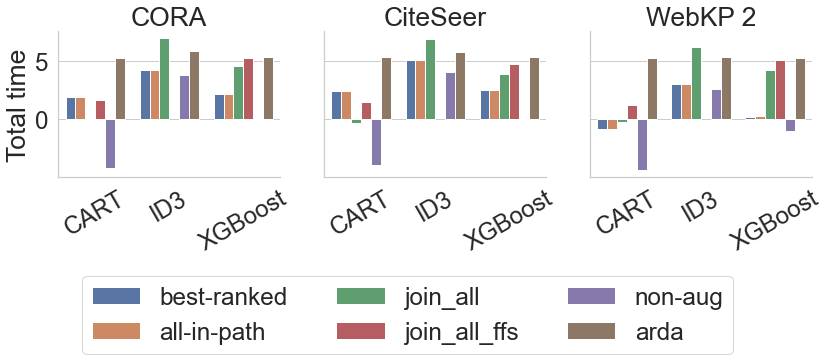

In [31]:
from cmath import log
# display(train_time)

#### TOTAL TIME BIG datasets
# label_order = {'best-ranked': 0, 'all-in-path': 1, 'join_all': 2}

total_time.sort_values(by=['algorithm'], ascending=True, inplace=True)
total_time_filtered = total_time[total_time['dataset'].isin(big_datasets)]
# total_time_filtered = total_time_filtered[total_time_filtered['approach'] != 'join_all']
total_time_filtered['total_time'] = total_time_filtered.apply(lambda row: log(row['total_time']), axis=1)
total_time_filtered.sort_values(by=['approach'], key=lambda x: x.map(label_order), inplace=True)


sns.set(font_scale=2.2, style="whitegrid")
colors = sns.color_palette("Set2")

g = sns.catplot(x="algorithm", y="total_time", hue="approach", col="dataset", data=total_time_filtered, kind="bar", height=4,
               order=algs)

g.set_titles("{col_name}")
g.set_xlabels('')
g.set_ylabels('Total time')

loc, labels = plt.xticks()
hh, ll = plt.gca().get_legend_handles_labels()

g.set_xticklabels(labels, rotation=30)
g._legend.remove()

plt.legend(hh, ll, bbox_to_anchor=(0.7, -1.3), loc=4, ncol=3)


g.savefig('plots/total-time-all-big.pdf', dpi=300, bbox_inches="tight")